In [1]:
import numpy as np
import xarray as xr

### Preliminaries

In [2]:
###############################
# Set paths
# UPDATE THIS FOR REPRODUCTION
###############################
nex_in = '/gpfs/group/kaf26/default/dcl5300/lafferty-sriver_inprep_tbh_DATA/cmip6/nex-gddp/'
cil_in = '/gpfs/group/kaf26/default/dcl5300/lafferty-sriver_inprep_tbh_DATA/cmip6/cil-gdpcir/'

In [3]:
###################
# Models
###################

# nex models with all SSPs and variables (tas, pr)
complete_nex_models = ['ACCESS-CM2', 'ACCESS-ESM1-5', 'CanESM5', 'CMCC-ESM2', 
                       'CNRM-CM6-1', 'CNRM-ESM2-1', 'EC-Earth3',
                       'EC-Earth3-Veg-LR', 'FGOALS-g3', 'GFDL-CM4', 'GFDL-ESM4', 
                       'GISS-E2-1-G', 'INM-CM4-8', 'INM-CM5-0',
                       'IPSL-CM6A-LR', 'KACE-1-0-G', 'MIROC-ES2L', 'MIROC6',
                       'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NorESM2-LM',
                       'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL']

# cil models with all SSPs and variables
complete_cil_models = ["INM-CM4-8", "INM-CM5-0", "BCC-CSM2-MR", "CMCC-CM2-SR5",
              "CMCC-ESM2", "MIROC-ES2L", "MIROC6", "UKESM1-0-LL", "MPI-ESM1-2-LR",
              "NorESM2-LM", "NorESM2-MM", "GFDL-ESM4", "EC-Earth3", 
              "EC-Earth3-Veg-LR", "EC-Earth3-Veg", "CanESM5"]

# intersection of models
models = np.intersect1d(complete_cil_models, complete_nex_models)

In [4]:
models

array(['CMCC-ESM2', 'CanESM5', 'EC-Earth3', 'EC-Earth3-Veg-LR',
       'GFDL-ESM4', 'INM-CM4-8', 'INM-CM5-0', 'MIROC-ES2L', 'MIROC6',
       'MPI-ESM1-2-LR', 'NorESM2-LM', 'NorESM2-MM', 'UKESM1-0-LL'],
      dtype='<U16')

In [5]:
model = models[8]

In [6]:
model

'MIROC6'

In [7]:
# NEX
ds_nex = xr.open_dataset('/gpfs/group/kaf26/default/dcl5300/lafferty-sriver_inprep_tbh_DATA/cmip6/nex-gddp/annual_avgs/' + model + '.nc')

In [8]:
# CIL
ds_cil = xr.open_dataset('/gpfs/group/kaf26/default/dcl5300/lafferty-sriver_inprep_tbh_DATA/cmip6/cil-gdpcir/annual_avgs/' + model + '.nc')

In [11]:
# Prep for merge
ds_cil = ds_cil.rename({'tasavg':'tas'})
ds_cil = ds_cil.sel(lat=slice(-60, 90))
ds_cil = ds_cil.assign_coords(ensemble = 'CIL')

ds_nex['lon'] = np.where(ds_nex['lon'] > 180, ds_nex['lon'] - 360, ds_nex['lon'])
ds_nex = ds_nex.sortby('lon')
ds_nex = ds_nex.assign_coords(ensemble = 'NEX')

ds_cil = ds_cil.sortby('ssp')
ds_nex = ds_nex.sortby('ssp')

ds_cil['time'] = ds_cil.indexes['time'].year
ds_nex['time'] = ds_nex.indexes['time'].year

In [12]:
%%time
ds = xr.concat([ds_nex, ds_cil], dim='ensemble')

CPU times: user 27.2 s, sys: 17.8 s, total: 45 s
Wall time: 1min 7s


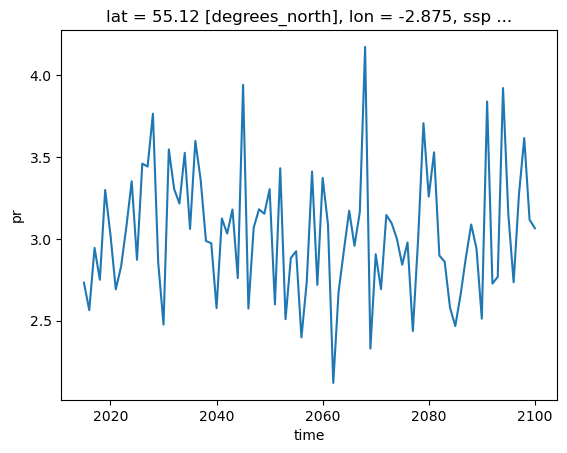

In [13]:
ds.sel(lat=55, lon=-3, method='nearest').sel(ssp='ssp585', ensemble='CIL')['pr'].plot()

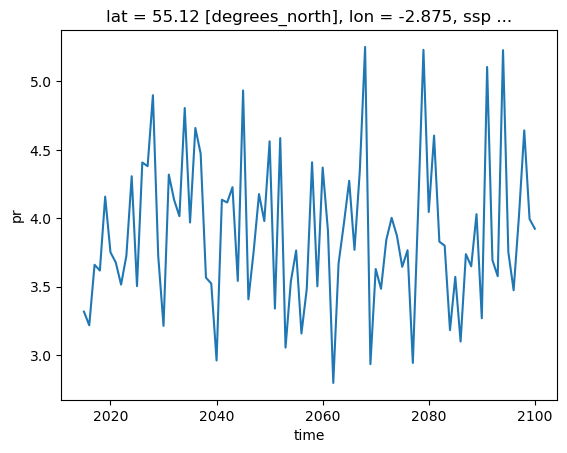

In [14]:
ds.sel(lat=55, lon=-3, method='nearest').sel(ssp='ssp585', ensemble='NEX')['pr'].plot()